# Loading the Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yaml
import math

%matplotlib inline

In [2]:
try:
    with open("../config2.yaml", "r") as file:
        config = yaml.safe_load(file)
except:
    print("The configuration file was not found!")

In [3]:
df_profile = pd.read_csv(config['data']['raw']['file1'])
df_digital1 = pd.read_csv(config['data']['raw']['file2'])
df_digital2 = pd.read_csv(config['data']['raw']['file3'])
df_experiment  = pd.read_csv(config['data']['raw']['file4'])

In [4]:
df_digital = pd.concat([df_digital1, df_digital2]).reset_index(drop = True)

In [5]:
print("Client Profiles:")
display(df_profile.head())
print("Digital Footprint:")
display(df_digital.head())
print("Experiment Roster:")
display(df_experiment.head())

Client Profiles:


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


Digital Footprint:


,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


Experiment Roster:


,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


# Initial Exploration

### Client Profile dataset

In [8]:
#Explore the client profile dataset
df_profile.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [9]:
#Retrieving the number of rows and columns in the dataframe
print("The initial client profile dataframe has", df_profile.shape[0], 'rows and', df_profile.shape[1], 'columns')

The initial client profile dataframe has 70609 rows and 9 columns


In [10]:
# Displaying the data types of each column in the dataframe
df_profile.dtypes

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

In [6]:
#Cleaning column names
clean_profile = df_profile.copy()
clean_profile = df_profile.rename(columns = lambda x: x.strip().lower())

clean_profile.columns = ['client_id', 'tenure_yr', 'tenure_mnth', 'age', 'gender', 'num_acc', 'balance', 'calls', 'log_ons']
clean_profile.head()

,client_id,tenure_yr,tenure_mnth,age,gender,num_acc,balance,calls,log_ons
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [7]:
#Using applymap() to convert all strings to lowercase
clean_profile = clean_profile.applymap(lambda x: x.lower() if isinstance(x, str) else x)
clean_profile

/var/folders/kz/yfq5dclx7cd6vx_pj9dj5d6m0000gn/T/ipykernel_49566/1702608284.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  clean_profile = clean_profile.applymap(lambda x: x.lower() if isinstance(x, str) else x)


,client_id,tenure_yr,tenure_mnth,age,gender,num_acc,balance,calls,log_ons
0,836976,6.0,73.0,60.5,u,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,u,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,u,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,m,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,f,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,u,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,m,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,f,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,m,3.0,475114.69,4.0,4.0


In [8]:
#Grouping gender into either 'm', 'f', or 'na'
def map_gender(value):
    if value in ['u', 'x']:
        return 'na'
    else:
        return value

clean_profile['gender'] = clean_profile['gender'].apply(map_gender)
clean_profile['gender'].unique()

array(['na', 'm', 'f', nan], dtype=object)

In [9]:
#Checking for null values
print(clean_profile.isna().any())

client_id      False
tenure_yr       True
tenure_mnth     True
age             True
gender          True
num_acc         True
balance         True
calls           True
log_ons         True
dtype: bool


In [17]:
#Dropping rows with any missing values
clean_profile.dropna(inplace = True)
clean_profile.head()


The final client profile dataframe has 70594 rows and 9 columns



### Digital Footprint Dataset

In [19]:
#Explore the digital footprint dataset
df_digital.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [26]:
#Retrieving the number of rows and columns in the initial dataset
print("The initial digital footprint dataframe has", df_digital.shape[0], 'rows and', df_digital.shape[1], 'columns')

The final digital footprint dataframe has 755405 rows and 5 columns


In [21]:
# Displaying the data types of each column in the dataframe
df_digital.dtypes

client_id        int64
visitor_id      object
visit_id        object
process_step    object
date_time       object
dtype: object

In [24]:
#Checking for null values
df_digital.isna().any()

client_id       False
visitor_id      False
visit_id        False
process_step    False
date_time       False
dtype: bool

### Experiment Roster Dataset

In [25]:
#Explore the experiment roster dataset
df_experiment.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [27]:
#Retrieving the number of rows and columns in the initial dataset
print("The initial experiment roster dataframe has", df_experiment.shape[0], 'rows and', df_experiment.shape[1], 'columns')

The initial experiment roster dataframe has 70609 rows and 2 columns


In [28]:
# Displaying the data types of each column in the dataframe
df_experiment.dtypes

client_id     int64
Variation    object
dtype: object

In [29]:
#Checking for null values
df_digital.isna().any()

client_id       False
visitor_id      False
visit_id        False
process_step    False
date_time       False
dtype: bool

# Univariate Analysis

In [14]:
#summary statistics of the dataset
clean_profile.describe()

,client_id,tenure_yr,tenure_mnth,age,num_acc,balance,calls,log_ons
count,7.059400e+04,70594.000000,70594.000000,70594.000000,70594.000000,7.059400e+04,70594.000000,70594.000000
mean,5.005026e+06,12.053007,150.659999,46.442240,2.255532,1.474467e+05,3.382469,5.566720
std,2.877289e+06,6.871850,82.090264,15.591273,0.535000,3.015106e+05,2.236595,2.353296
min,1.690000e+02,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519543e+06,6.000000,82.000000,32.500000,2.000000,3.734660e+04,1.000000,4.000000
50%,5.016974e+06,11.000000,136.000000,47.000000,2.000000,6.333459e+04,3.000000,5.000000
75%,7.483074e+06,16.000000,192.000000,59.000000,2.000000,1.375461e+05,6.000000,7.000000
max,9.999839e+06,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


In [31]:
primary_clients = pd.merge(clean_profile, df_digital, on = 'client_id', how = 'inner')
primary_clients.head()

,client_id,tenure_yr,tenure_mnth,age,gender,num_acc,balance,calls,log_ons,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,na,2.0,45105.3,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13
1,836976,6.0,73.0,60.5,na,2.0,45105.3,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50
2,836976,6.0,73.0,60.5,na,2.0,45105.3,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
3,836976,6.0,73.0,60.5,na,2.0,45105.3,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08
4,836976,6.0,73.0,60.5,na,2.0,45105.3,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24


In [32]:
#Checking for null values
primary_clients.isna().any()

client_id       False
tenure_yr       False
tenure_mnth     False
age             False
gender          False
num_acc         False
balance         False
calls           False
log_ons         False
visitor_id      False
visit_id        False
process_step    False
date_time       False
dtype: bool

In [33]:
# Creating a crosstab table for the 'gender' column, counting occurrences for each unique value
my_table = pd.crosstab(index = primary_clients["gender"],
                              columns="count")
my_table

col_0,count
gender,
f,146205
m,151877
na,151622


/var/folders/kz/yfq5dclx7cd6vx_pj9dj5d6m0000gn/T/ipykernel_49566/1597037605.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=my_table.index, y=my_table["count"], palette="Set3")


<Axes: xlabel='gender', ylabel='count'>

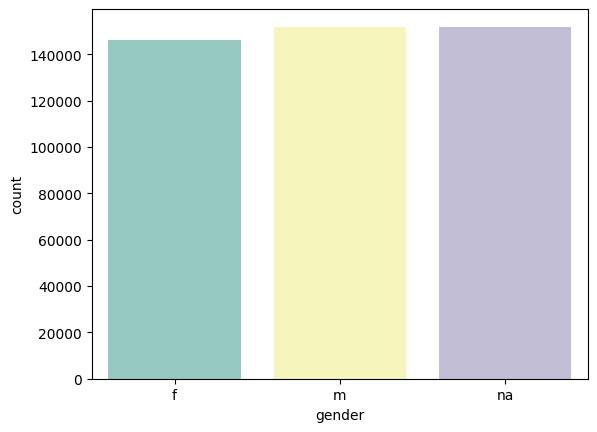

In [39]:
# Plotting a bar chart using the 'count' values from 'my_table'
sns.barplot(x=my_table.index, y=my_table["count"], palette="Set3")

<Axes: xlabel='age', ylabel='Count'>

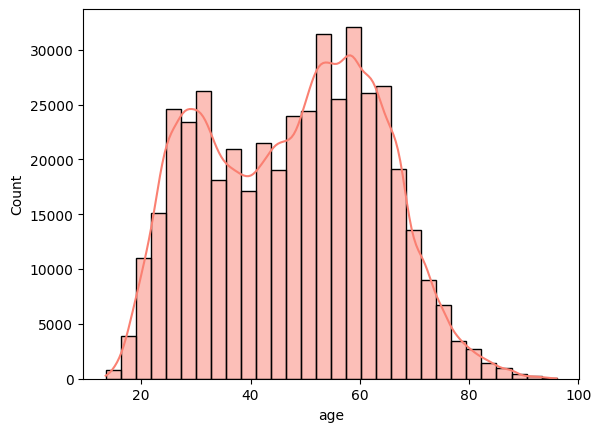

In [44]:
# Plotting a histogram for the 'age' column of the 'primary_clients' dataframe
sns.histplot(primary_clients['age'], kde=True, bins=30, color="salmon")

In [45]:
# Creating a crosstab table for the 'num_acc' column, counting occurrences for each unique value
account_freq = pd.crosstab(index = primary_clients["num_acc"],
                              columns="count")
account_freq

col_0,count
num_acc,
1.0,8
2.0,350166
3.0,82534
4.0,14797
5.0,1922
6.0,209
7.0,60
8.0,8


/var/folders/kz/yfq5dclx7cd6vx_pj9dj5d6m0000gn/T/ipykernel_49566/4209987028.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=account_freq.index, y=account_freq["count"], palette="Set3")


<Axes: xlabel='num_acc', ylabel='count'>

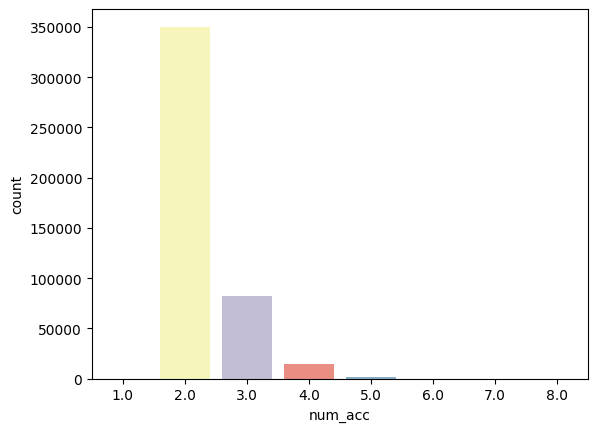

In [46]:
# Plotting a bar chart using the 'count' values from 'my_table'
sns.barplot(x=account_freq.index, y=account_freq["count"], palette="Set3")

<Axes: xlabel='tenure_yr', ylabel='Count'>

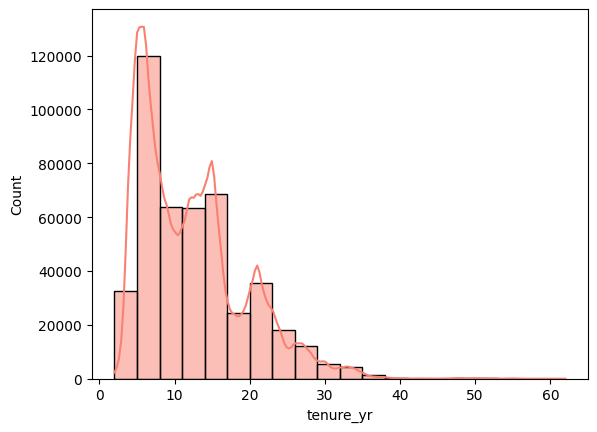

In [56]:
# Plotting a histogram of client tenure
sns.histplot(primary_clients['tenure_yr'], kde = True, bins = 20, color = 'salmon')

<Axes: ylabel='tenure_yr'>

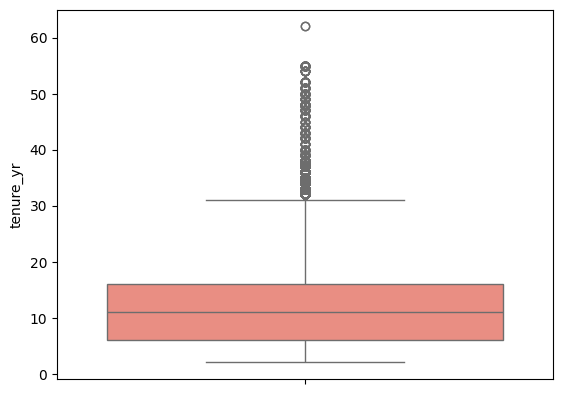

In [60]:
#Boxplot
sns.boxplot(data = primary_clients['tenure_yr'], color="salmon")